In [1]:
# https://medium.com/python-data/effient-frontier-in-python-34b0c3043314


import pandas as pd
import numpy as np
from pandas_datareader import data as web

In [2]:
data = pd.DataFrame()

tickers = ['AAPL']

for item in tickers:
    data[item] = web.DataReader(item, data_source='yahoo', start='01-01-2000')['Adj Close']

data.head()

,AAPL
Date,
1999-12-31,3.194901
2000-01-03,3.478462
2000-01-04,3.185191
2000-01-05,3.231803
2000-01-06,2.952128


In [3]:
# (Simple Returns with the formula)
simple_returns1 = (data / data.shift(1)) - 1
simple_returns1.head()

,AAPL
Date,
1999-12-31,NaN
2000-01-03,0.088754
2000-01-04,-0.084311
2000-01-05,0.014634
2000-01-06,-0.086538


In [4]:
# Alternative solution

simple_returns2 = data.pct_change()
simple_returns2.head()

,AAPL
Date,
1999-12-31,NaN
2000-01-03,0.088754
2000-01-04,-0.084311
2000-01-05,0.014634
2000-01-06,-0.086538


In [5]:
# (Getting log returns)

log_returns = np.log(data / data.shift(1))
log_returns.head()

,AAPL
Date,
1999-12-31,NaN
2000-01-03,0.085034
2000-01-04,-0.088078
2000-01-05,0.014528
2000-01-06,-0.090514


In [6]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import random

In [7]:
scraped_tickers = ['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BCR', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'COH', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DLPH', 'DAL', 'XRAY', 'DVN', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DOV', 'DWDP', 'DPS', 'DTE', 'DRE', 'DUK', 'DXC', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EVHC', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FISV', 'FLIR', 'FLS', 'FLR', 'FMC', 'FL', 'F', 'FTV', 'FBHS', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GS', 'GT', 'GWW', 'HAL', 'HBI', 'HOG', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HP', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HPQ', 'HUM', 'HBAN', 'IDXX', 'INFO', 'ITW', 'ILMN', 'IR', 'INTC', 'ICE', 'IBM', 'INCY', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IRM', 'JEC', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB', 'LLL', 'LH', 'LRCX', 'LEG', 'LEN', 'LVLT', 'LUK', 'LLY', 'LNC', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'KORS', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'PCAR', 'PKG', 'PH', 'PDCO', 'PAYX', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PCLN', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'Q', 'RRC', 'RJF', 'RTN', 'O', 'RHT', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RCL', 'CRM', 'SBAC', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SRE', 'SHW', 'SIG', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SPGI', 'SWK', 'SPLS', 'SBUX', 'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYF', 'SNPS', 'SYY', 'TROW', 'TGT', 'TEL', 'FTI', 'TXN', 'TXT', 'TMO', 'TIF', 'TWX', 'TJX', 'TMK', 'TSS', 'TSCO', 'TDG', 'TRV', 'TRIP', 'FOXA', 'FOX', 'TSN', 'UDR', 'ULTA', 'USB', 'UA', 'UAA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WFC', 'HCN', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']

In [8]:
len(scraped_tickers)

505

In [9]:
# make a portfolio of randomly 5 listed stocks from the big list

random_selection = random.sample(scraped_tickers, 5)
random_selection

['ILMN', 'CMA', 'PDCO', 'CXO', 'COO']

In [10]:
# pull Adjusted closing prices with Pandas datareader and check the head of this data

data = pd.DataFrame()

for item in random_selection:
    data[item] = web.DataReader(item, data_source='yahoo', start='15-09-2016')['Adj Close']

data.head()

,ILMN,CMA,PDCO,CXO,COO
Date,,,,,
2016-09-14,171.779999,42.464756,39.865807,122.730644,185.394470
2016-09-15,174.940002,43.205536,40.481422,124.619576,189.761261
2016-09-16,172.970001,42.909222,40.578163,124.659348,188.372299
2016-09-19,173.149994,42.918488,40.499016,123.297325,188.332352
2016-09-20,175.800003,42.733292,40.657314,122.054604,186.273834


In [11]:
# simple daily returns with .pct_change() method

daily_simple_returns = data.pct_change()
daily_simple_returns.head()

,ILMN,CMA,PDCO,CXO,COO
Date,,,,,
2016-09-14,NaN,NaN,NaN,NaN,NaN
2016-09-15,0.018396,0.017445,0.015442,0.015391,0.023554
2016-09-16,-0.011261,-0.006858,0.002390,0.000319,-0.007320
2016-09-19,0.001041,0.000216,-0.001950,-0.010926,-0.000212
2016-09-20,0.015305,-0.004315,0.003909,-0.010079,-0.010930


In [12]:
# annualise daily returns. 250 trading days in a year

annual_returns = daily_simple_returns.mean() * 250
annual_returns

ILMN    0.262881
CMA     0.178374
PDCO   -0.124793
CXO    -0.022482
COO     0.195670
dtype: float64

In [13]:
# number of assets in the randomly selected portfolio

num_assets = len(random_selection)
num_assets

5

In [14]:
# sum of weights must equal 1. 
# (a / a+b) + (b / a+b) = 1 
# applying this logic above

weights = np.random.random(num_assets)
weights = weights / sum(weights)
weights

array([0.07957487, 0.21642272, 0.27055357, 0.10570559, 0.32774325])

In [15]:
# check if the sum of weights is indeed = 1
sum(weights)

1.0

In [16]:
# calculate expected returns of the portfolio 

port_returns_expected = np.sum(weights * annual_returns)
port_returns_expected

0.0875124586077359

In [17]:
# convert the float into a percentage cos why not ;)

print(str(round(port_returns_expected * 100, 2)) + '%')

8.75%


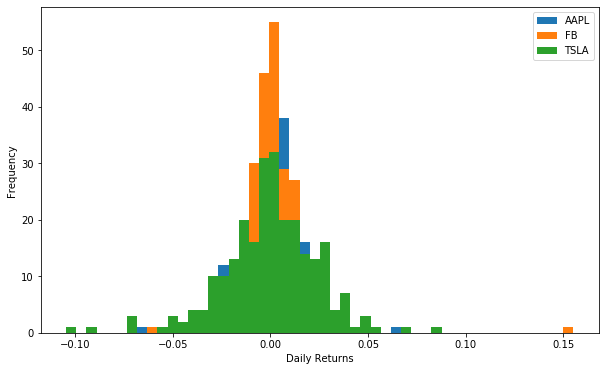

In [19]:
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

start = datetime(2016,1,1)
end = datetime(2017,1,1)

assets = ['AAPL', 'FB', 'TSLA']

df = pd.DataFrame()

for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start=start, end=end)['Adj Close']

asset_returns_daily = df.pct_change()
asset_volatility_daily = asset_returns_daily.std()

asset_returns_daily.plot.hist(bins=50, figsize=(10,6));
plt.xlabel('Daily Returns')
plt.show()

In [20]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np

assets =  ['AAPL', 'GM', 'GE', 'FB', 'WMT'] 

df = pd.DataFrame()  

for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo',
                               start='2015-1-1' , end='2017-1-1')['Adj Close']

d_returns = df.pct_change()  

cov_matrix_d = d_returns.cov()
cov_matrix_a = cov_matrix_d * 250

weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])  # assign equal weights

# calculate the variance and risk of the portfolo
port_variance = np.dot(weights.T, np.dot(cov_matrix_a, weights))
port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_a, weights)))

percent_var = str(round(port_variance, 4) * 100) + '%'
percent_vols = str(round(port_volatility, 4) * 100) + '%'

print('Variance of Portfolio is {}, Portfolio Risk is {}'.format(percent_var, percent_vols))

Variance of Portfolio is 2.5700000000000003%, Portfolio Risk is 16.02%


In [21]:
# Answer for Q1
import numpy as np

#store the variables in arrays
prob = np.array([0.25, 0.5, 0.25])
rate_1 = np.array([0.05, 0.075, 0.10])
rate_2 = np.array([0.2, 0.15, 0.1])

# expected return of each investment
expected_return1 = np.sum(prob * rate_1)
expected_return2 = np.sum(prob * rate_2)

In [22]:
# expected return of the equally weighted portfolio
weights = np.array([0.5, 0.5])
individual_returns = np.array([rate_1, rate_2])
portfolio_returns = np.dot(weights, individual_returns)

In [23]:
# covariance matrix of the equally weighted portfolio given probabilities
cov_matrix = np.cov(rate_1, rate_2, ddof=0, aweights=prob)

In [24]:
#  variance and standard deviation of each investment
var1 = cov_matrix[0,0]  # variance of any asset is the covariance of its returns WITH its returns
var2 = cov_matrix[1,1]  # variance of any asset is the covariance of its returns WITH its returns
std1 = np.sqrt(var1)  # std deviation is simply the square root of the variance
std2 = np.sqrt(var2)  # std deviation is simply the square root of the variance

#  correlation between Asset 1 & 2's returns
cov = cov_matrix[0,1]
corr = cov / (std1 * std2)  # correlation of returns between 2 assets = covariance of their returns / (their std multiplied)

#  variance of portfolio
portfolio_var = np.dot(weights.T, np.dot(cov_matrix, weights))

# standard deviation (volatility of the portfolio)
portfolio_vols = np.sqrt(portfolio_var)

In [26]:
#  just a function that returns a percentile for a given float
def percentage (number):
    return str(np.round(number, 4) * 100) + '%'

#  print the various variables for intepretation 
print('Expected Return of Investment 1 = {}'.format(percentage(expected_return1)))
print('Expected Return of Investment 2 = {}'.format(percentage(expected_return2)))
print('Expected Return of Portfolio = {}'.format(percentage(portfolio_returns)))
print('Standard Deviation of Investment 1 = {}'.format(percentage(std1)))
print('Standard Deviation of Investment 1 = {}'.format(percentage(std2)))
print('Correlation between Returns of 1 & 2 = {}'.format(round(corr, 4)))
print('Risk of Portfilio = {}'.format(percentage(portfolio_vols)))

Expected Return of Investment 1 = 7.5%
Expected Return of Investment 2 = 15.0%
Expected Return of Portfolio = [12.5  11.25 10.  ]%
Standard Deviation of Investment 1 = 1.77%
Standard Deviation of Investment 1 = 3.54%
Correlation between Returns of 1 & 2 = -1.0
Risk of Portfilio = 0.88%


In [28]:
import quandl
quandl.ApiConfig.api_key = 'K2_QhN367bave427b6xY'
# get the table for daily stock prices and,
# filter the table for selected tickers, columns within a time range
# set paginate to True because Quandl limits tables API to 10,000 rows per call

data = quandl.get_table('WIKI/PRICES', ticker = ['AAPL', 'MSFT', 'WMT'], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': '2015-12-31', 'lte': '2016-12-31' }, 
                        paginate=True)
data.head()

,ticker,date,adj_close
None,,,
0,WMT,2016-12-30,67.742045
1,WMT,2016-12-29,67.879254
2,WMT,2016-12-28,67.928257
3,WMT,2016-12-27,68.310482
4,WMT,2016-12-23,68.153672


In [29]:
# create a new dataframe with 'date' column as index
new = data.set_index('date')

# use pandas pivot function to sort adj_close by tickers
clean_data = new.pivot(columns='ticker')

# check the head of the output
clean_data.head()

adj_close                      
ticker            AAPL       MSFT        WMT
date                                        
2015-12-31  101.696810  52.829107  58.379766
2016-01-04  101.783763  52.181598  58.532144
2016-01-05   99.233131  52.419653  59.922592
2016-01-06   97.291172  51.467434  60.522580
2016-01-07   93.185040  49.677262  61.932075

In [32]:
# import needed modules
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get adjusted closing prices of 5 selected companies with Quandl
quandl.ApiConfig.api_key = 'K2_QhN367bave427b6xY'
selected = ['CNP', 'F', 'WMT', 'GE', 'TSLA']
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2017-1-1', 'lte': '2019-12-31' }, paginate=True)

# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
clean = data.set_index('date')
table = clean.pivot(columns='ticker')
table.head()

adj_close                                         
ticker            CNP          F         GE    TSLA        WMT
date                                                          
2017-01-03  23.664587  11.923135  30.870473  216.99  67.291215
2017-01-04  23.876307  12.472414  30.880215  226.99  67.683241
2017-01-05  23.876307  12.093601  30.704870  226.75  67.830251
2017-01-06  24.405609  12.084131  30.792542  229.01  66.899190
2017-01-09  23.943673  11.961016  30.646421  231.28  67.340219

In [33]:
# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

df.head()

,Returns,Volatility,CNP Weight,F Weight,WMT Weight,GE Weight,TSLA Weight
0,-0.033724,0.124326,0.469974,0.044917,0.234069,0.158975,0.092066
1,0.153793,0.121756,0.578008,0.027366,0.007322,0.096418,0.290886
2,-0.056556,0.188428,0.026746,0.313584,0.239547,0.392342,0.027782
3,-0.051204,0.119436,0.288771,0.320437,0.180532,0.045583,0.164677
4,-0.141272,0.136778,0.272043,0.206683,0.329240,0.157631,0.034404


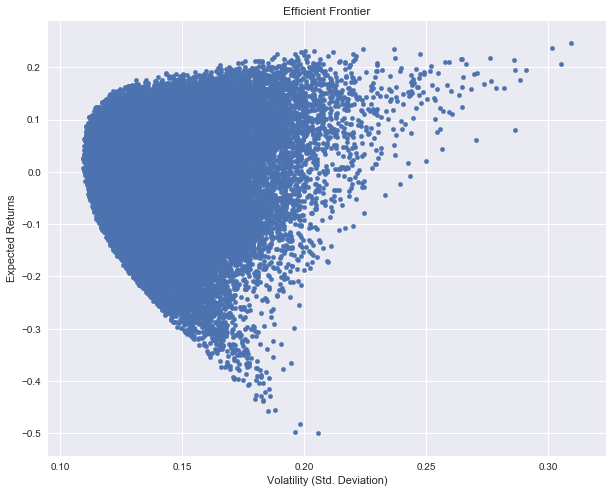

In [34]:
# plot the efficient frontier with a scatter plot
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

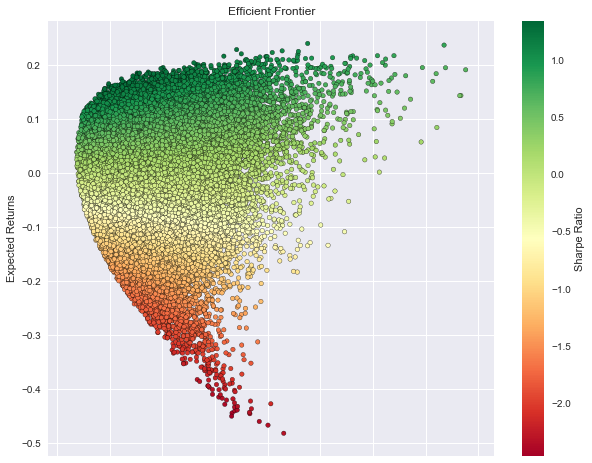

In [38]:
# get adjusted closing prices of 5 selected companies with Quandl
quandl.ApiConfig.api_key = 'K2_QhN367bave427b6xY'
selected = ['CNP', 'F', 'WMT', 'GE', 'TSLA']
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2017-1-1', 'lte': '2019-12-31' }, paginate=True)

# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
clean = data.set_index('date')
table = clean.pivot(columns='ticker')

# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

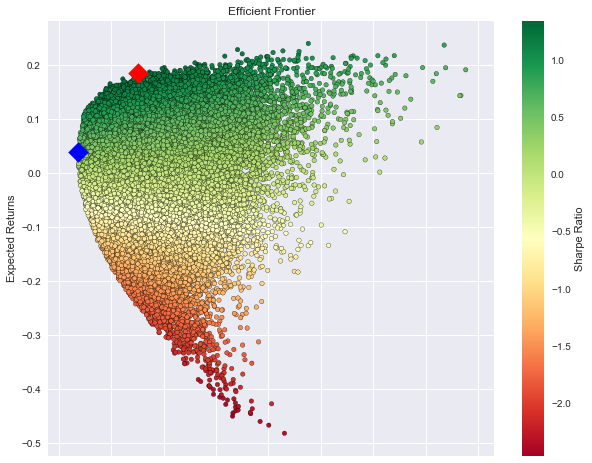

In [39]:
# find min Volatility & max sharpe values in the dataframe (df)
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [40]:
# print the details of the 2 special portfolios
print(min_variance_port.T)
print(sharpe_portfolio.T)

                  5366
Returns       0.038877
Volatility    0.109306
Sharpe Ratio  0.355672
CNP Weight    0.478290
F Weight      0.182497
WMT Weight    0.097991
GE Weight     0.032243
TSLA Weight   0.208978
                  2013
Returns       0.185116
Volatility    0.137990
Sharpe Ratio  1.341513
CNP Weight    0.356319
F Weight      0.023713
WMT Weight    0.000530
GE Weight     0.133938
TSLA Weight   0.485500


In [50]:
import pandas as pd
import statsmodels.api as sm
import os
os.chdir("C:/Users/ankit/ML_datasets")
'''
CSV file downloaded from Yahoo File
start period: 09/1/2015 
end period: 09/1/2020
period format: DD/MM/YEAR
'''
fb = pd.read_csv('FB_com.csv', parse_dates=True, index_col='Date',)
sp_500 = pd.read_csv('^GSPC_com.csv', parse_dates=True, index_col='Date')

# joining the closing prices of the two datasets 
monthly_prices = pd.concat([fb['Close'], sp_500['Close']], axis=1)
monthly_prices.columns = ['FB', '^GSPC']

# check the head of the dataframe
print(monthly_prices.head())

# calculate monthly returns
monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0)  # drop first missing row
print(clean_monthly_returns.head())

                   FB        ^GSPC
Date                              
2015-02-01  78.970001  2104.500000
2015-03-01  82.220001  2067.889893
2015-04-01  78.769997  2085.510010
2015-05-01  79.190002  2107.389893
2015-06-01  85.769997  2063.110107
                  FB     ^GSPC
Date                          
2015-03-01  0.041155 -0.017396
2015-04-01 -0.041961  0.008521
2015-05-01  0.005332  0.010491
2015-06-01  0.083091 -0.021012
2015-07-01  0.096071  0.019742


In [51]:
# split dependent and independent variable
X = clean_monthly_returns['^GSPC']
y = clean_monthly_returns['FB']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     FB   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     20.24
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           3.42e-05
Time:                        22:16:09   Log-Likelihood:                 81.771
No. Observations:                  59   AIC:                            -159.5
Df Residuals:                      57   BIC:                            -155.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0110      0.008      1.333      0.1

In [52]:
# alternatively scipy linear regression
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

print(slope)

1.0697690623391625


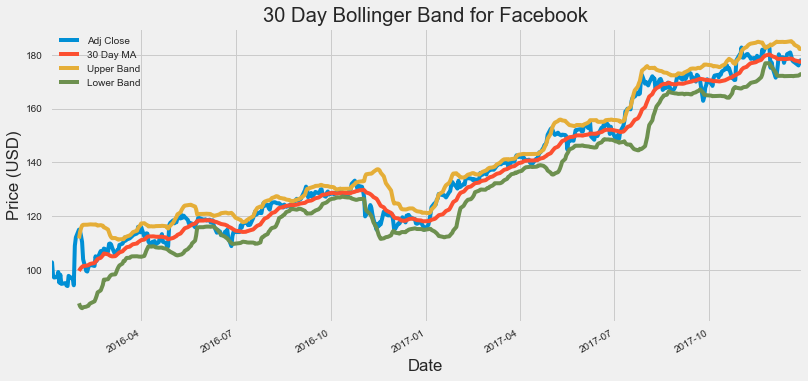

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as web

# Make function for calls to Yahoo Finance
def get_adj_close(ticker, start, end):
    '''
    A function that takes ticker symbols, starting period, ending period
    as arguments and returns with a Pandas DataFrame of the Adjusted Close Prices
    for the tickers from Yahoo Finance
    '''
    start = start
    end = end
    info = web.DataReader(ticker, data_source='yahoo', start=start, end=end)['Adj Close']
    return pd.DataFrame(info)

# Get Adjusted Closing Prices for Facebook, Tesla and Amazon between 2016-2017
fb = get_adj_close('fb', '1/2/2016', '31/12/2017')
tesla = get_adj_close('tsla', '1/2/2016', '31/12/2017')
amazon = get_adj_close('amzn', '1/2/2016', '31/12/2017')

# Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band
for item in (fb, tesla, amazon):
    item['30 Day MA'] = item['Adj Close'].rolling(window=20).mean()
    
    # set .std(ddof=0) for population std instead of sample
    item['30 Day STD'] = item['Adj Close'].rolling(window=20).std() 
    
    item['Upper Band'] = item['30 Day MA'] + (item['30 Day STD'] * 2)
    item['Lower Band'] = item['30 Day MA'] - (item['30 Day STD'] * 2)

# Simple 30 Day Bollinger Band for Facebook (2016-2017)
fb[['Adj Close', '30 Day MA', 'Upper Band', 'Lower Band']].plot(figsize=(12,6))
plt.title('30 Day Bollinger Band for Facebook')
plt.ylabel('Price (USD)')
plt.show();

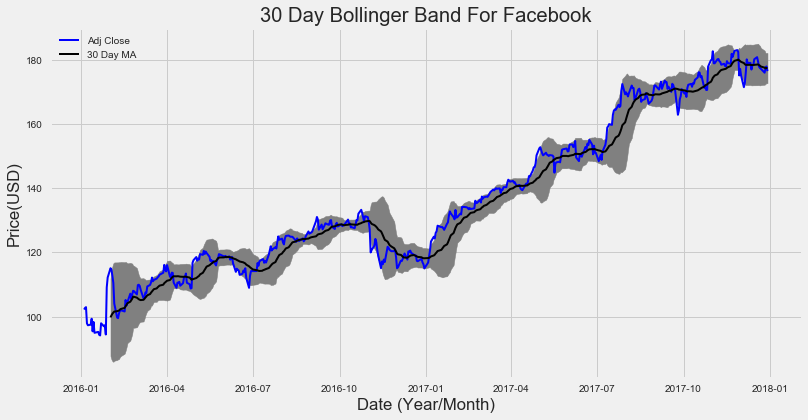

In [57]:
# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for facebook DataFrame
x_axis = fb.index.get_level_values(0)

# Plot shaded 21 Day Bollinger Band for Facebook
ax.fill_between(x_axis, fb['Upper Band'], fb['Lower Band'], color='grey')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, fb['Adj Close'], color='blue', lw=2)
ax.plot(x_axis, fb['30 Day MA'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title('30 Day Bollinger Band For Facebook')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend(['Adj Close', '30 Day MA'])
plt.show();